Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "WENBO SUN"
COLLABORATORS = "SHUAI WANG"

---
# Homework set 2

# Exercise 0
Write down the names + student ID of the people in your group.

WENBO SUN 13087347 \
SHUAI WANG 13128051

Run the following cell to import the nessecary packages.

In [2]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1 (2.1 on the Exercise sheet)

##### NOTE: You may also submit Exercise 1 as a pdf of your handwritten solutions if you prefer. If so, indicate this where you would put your answers below

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

##### handwriting solution in the pdf

## (b) 1 point
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

##### handwriting solution in the pdf

## (c) 2 points
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

##### handwriting solution in the pdf

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [16]:
def invertL(lower):
    n=lower.shape[0]
    I=np.identity(n)
    for i in range(n):
        for temp in range(0,i+1):
            I[i,temp]=I[i,temp]/lower[i,i]
        for j in range(i+1,n):
            coef= -lower[j,i]
            for k in range(0,n):
                I[j,k]+=(coef*I[i,k])
    return I
    
def invertU(upper):
    n=upper.shape[0]
    I=np.identity(n)
    for i in range(n-1,-1,-1):
        for temp in range(n-1,i-1,-1):
            I[i,temp]=I[i,temp]/upper[i,i]
        for j in range(i-1,-1,-1):
            coef= -upper[j,i]
            for k in range(n-1,-1,-1):
                I[j,k]+=(coef*I[i,k])
    return I

def invert(A):
    #invert the matrix A
    p,l,u=la.lu(A)
    A_inv=np.matmul(np.matmul(invertU(u),invertL(l)),p.T)
    return A_inv


In [22]:
a=np.tril([[2,2,3],[8,-7,6],[4,9,-27]])
b=invertL(a)
c= np.triu([[2,4,6],[0,-1,-8],[0,0,96]])
d=invertU(c)

print("test matrix is: ",np.matmul(a,c))
print("invert(invert(test matrix)) function is:", invert(invert(np.matmul(a,c))))

test matrix is:  [[    4     8    12]
 [   16    39   104]
 [    8     7 -2640]]
invert(invert(test matrix)) function is: [[    4.     8.    12.]
 [   16.    39.   104.]
 [    8.     7. -2640.]]


## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

```python
def invertL(lower):
    n=lower.shape[0]
    I=np.identity(n)
    for i in range(n):
        for temp in range(0,i+1):
            I[i,temp]=I[i,temp]/lower[i,i]
        for j in range(i+1,n):
            coef= -lower[j,i]
            for k in range(0,n):
                I[j,k]+=(coef*I[i,k])
    return I
```
The invert algorithm we implemented involves in two subprogrames. They share the similar procedure.
Consider the function invertL. For each loop from i=0 to n-1, the nested layer has two sub-loops. 
Given i, we have the total number of operations of both two invert procedure is:
$$
\begin{align}
    &2(\sum_{i=1}^{n}i+\sum_{i=1}^{n}n(n-i+1)) \\
    &=2\sum_{i=1}^{n}(n-1)(n-i) \\
    &=n(n-1)^2 \\
    &=\mathcal{O}(n^3)
\end{align}
$$

## (c) 1 point
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

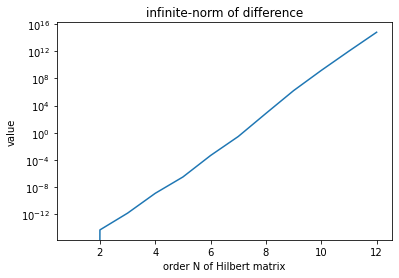

In [28]:
# YOUR CODE HERE
def norm_row(a):
    n=a.shape[0]
    m=0.0
    for i in range(n):
        norm=np.sum(np.abs(a[i]))
        if norm>m:
            m=norm
    return m

norm_inv=[]
for i in range(1,13):
    h=la.hilbert(i)
    inv_h=invert(h)
    t_inv_h=la.invhilbert(i)
    dif=t_inv_h-inv_h
    m_i=norm_row(dif)
    norm_inv.append(m_i)
f=plt.figure()
plt.semilogy(range(1,13),norm_inv)
plt.title("infinite-norm of difference")
plt.xlabel("order N of Hilbert matrix")
plt.ylabel("value")
plt.show()


## (d) 2 points
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

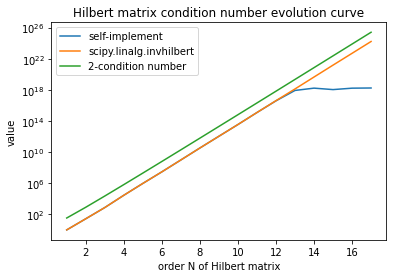

In [23]:
# YOUR CODE HERE
own=[]
sys=[]
coef=[]
for i in range(1,18):
    h=la.hilbert(i)
    t_inv_h=la.invhilbert(i)
    inv_h=invert(h)
    norm_h=norm_row(h)
    norm_inv=norm_row(inv_h)
    norm_t_inv=norm_row(t_inv_h)
    own.append(norm_h*norm_inv)
    sys.append(norm_h*norm_t_inv)
    coef.append((1+np.sqrt(2))**(4*i)/np.sqrt(i))
f=plt.figure()
plt.semilogy(range(1,18),own, label = "self-implement")
plt.semilogy(range(1,18),sys, label= "scipy.linalg.invhilbert")
plt.semilogy(range(1,18),coef, label = "2-condition number")
plt.legend()
plt.xlabel("order N of Hilbert matrix")
plt.ylabel("value")
plt.title("Hilbert matrix condition number evolution curve")
plt.show()